In [7]:
library(naturalsort)
library(fields)
library(rasterImage)
library(viridis)

dataDir <- '~/jackgl/brain_1111_2/'
ctype <- 'GBM'

## Population size time series

In [8]:
flst <- naturalsort(list.files(dataDir))
flst <- flst[1:(length(flst)-1)]

In [9]:
Ns <- array(NA,dim=c(length(flst),5e3))
# Pops <- list()
# genes <- list()
# gentimes <- list()
mus <- rep(NA,100)
N0s <- rep(NA,100)

for (ii in 1:length(flst)) {
    load(paste0(dataDir,flst[ii]))
    N[N==0] <- NA
    Ns[ii,] <- N
#     genes <- append(genes,mut_genes)
#     gentimes <- append(gentimes,gen_time)
    mus[ii] <- mu
    N0s[ii] <- N0
    rm(Pop,gen_time,N,mut_genes)
}

In [10]:
get_fc <- function(N) {
    return(N[length(which(!is.na(N)))]/N[1])
}

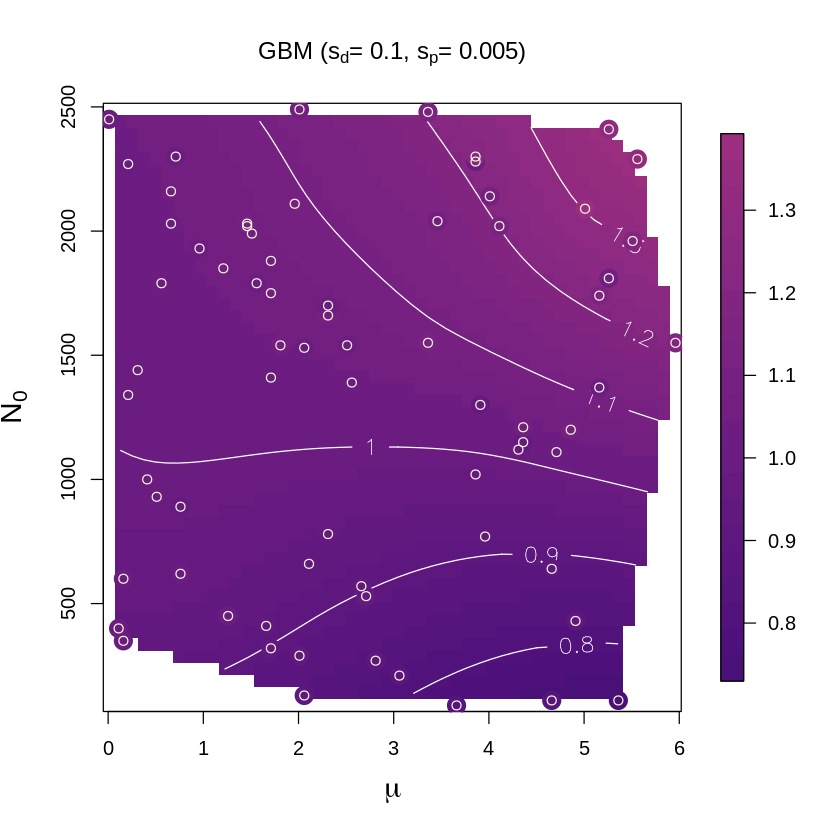

In [11]:
# Assign data to temporary objects
x <- mus
y <- N0s
z <- as.vector(apply(Ns,1,get_fc))

# Thin plate spline interpolation to irregular data
test.spline <- Tps(data.frame(x[y>=50],y[y>=50]), z[y>=50])
new.grid <- predictSurface(test.spline, nx = 50, ny = 50)
cols <- magma(100)
cols <- cols[(round(min(new.grid$z[!is.na(new.grid$z)])*(length(cols)/3.1))):(round(max(new.grid$z[!is.na(new.grid$z)])*(length(cols)/3.1)))]
image.plot(new.grid,#xlim=c(0.06,6),ylim=c(10,2500),
          col=cols,
          xlab=expression(mu),
          ylab=expression(N[0]),
          cex.lab=1.5,
          main=bquote(paste(.(ctype),' (',s[d],'= 0.1, ',s[p],'= 0.005)')))
contour(new.grid,add=TRUE,nlevels=7,col='white',labcex=1.2)

cor <- data.frame(x=x,y=y,z=z)
test <- aggregate(cor, by=list(x,y), FUN=mean)
test$z <- cols[as.numeric(cut(test$z,breaks = length(cols)))]
points(test$x[test$y>=50],test$y[test$y>=50],col=test$z[test$y>=50],pch=20,cex=3)
points(test$x[test$y>=50],test$y[test$y>=50],pch=1,col='beige')


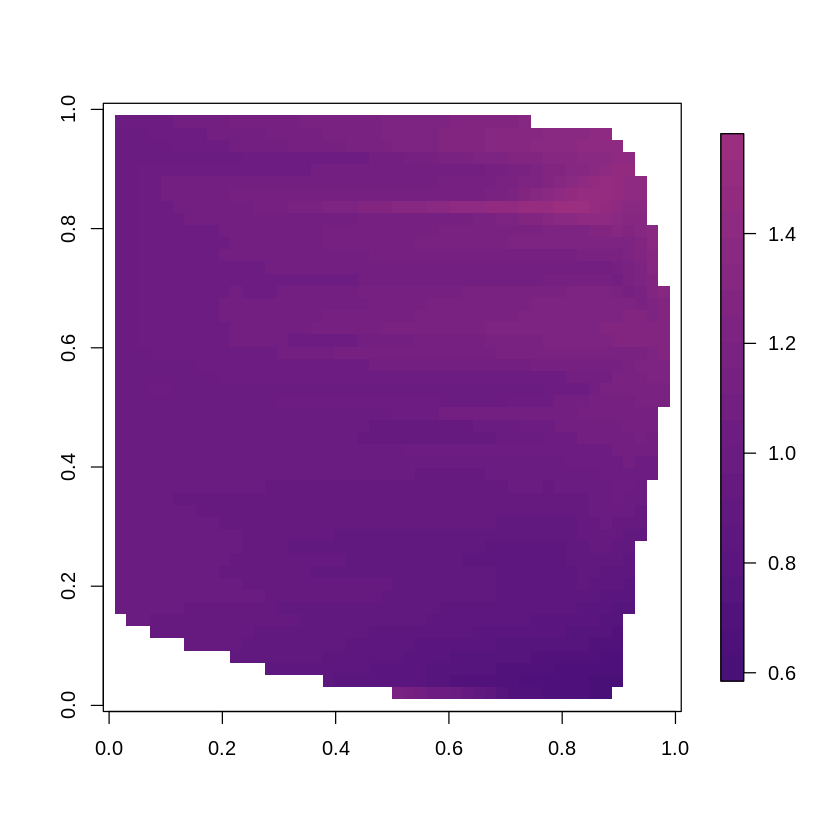

In [12]:
library(akima)
# Create the function.
mode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
akima.li <- interp(x, y, z, 
                   xo=seq(min(x), max(x), length = 50),
                   yo=seq(min(y), max(y), length = 50),
                  duplicate='user',
                  dupfun=mean)
image.plot(akima.li$z,col=cols)